# Social network ads determing purchase rates

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 

In [104]:
!wget "https://drive.google.com/uc?id=15WAD9_4CpUK6EWmgWVXU8YMnyYLKQvW8&export=download" -O data.csv -q

In [105]:
data = pd.read_csv("data.csv")
data[0:5]

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [106]:
data = data[['User ID', 'Gender', 'Age','EstimatedSalary', 'Purchased']]
data['Purchased'] = data['Purchased'].astype('int')
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [107]:
data.shape

(400, 5)

In [108]:
X = np.asarray(data[['User ID', 'Gender', 'Age','EstimatedSalary']])
X[0:5]

array([[15624510, 'Male', 19, 19000],
       [15810944, 'Male', 35, 20000],
       [15668575, 'Female', 26, 43000],
       [15603246, 'Female', 27, 57000],
       [15804002, 'Male', 19, 76000]], dtype=object)

In [109]:
y = np.asarray(data['Purchased'])
y [0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

## Preprocessing

In [110]:
replace_map = {'Gender' : {'Male': 0, 'Female': 1}}

In [111]:
data_replace = data.copy()
data_replace.replace(replace_map, inplace=True)

print(data_replace.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       0   19            19000          0
1  15810944       0   35            20000          0
2  15668575       1   26            43000          0
3  15603246       1   27            57000          0
4  15804002       0   19            76000          0


In [112]:
X = np.asarray(data_replace[['User ID', 'Gender', 'Age','EstimatedSalary']])
y = np.asarray(data_replace['Purchased'])
y [0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [113]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.94, -1.02, -1.78, -1.49],
       [ 1.67, -1.02, -0.25, -1.46],
       [-0.32,  0.98, -1.11, -0.79],
       [-1.23,  0.98, -1.02, -0.37],
       [ 1.57, -1.02, -1.78,  0.18]])

## Training and modelling

In [114]:

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (320, 4) (320,)
Test set: (80, 4) (80,)


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.09, solver='sag').fit(X_train,y_train)
LR

LogisticRegression(C=0.09, solver='sag')

In [116]:
yhat = LR.predict(X_test)
yhat[0:10]


array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [117]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:10]

array([[0.85, 0.15],
       [0.86, 0.14],
       [0.89, 0.11],
       [0.77, 0.23],
       [0.88, 0.12],
       [0.27, 0.73],
       [0.31, 0.69],
       [0.07, 0.93],
       [0.2 , 0.8 ],
       [0.76, 0.24]])

In [118]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[17  4]
 [ 4 55]]


Confusion matrix, without normalization
[[17  4]
 [ 4 55]]


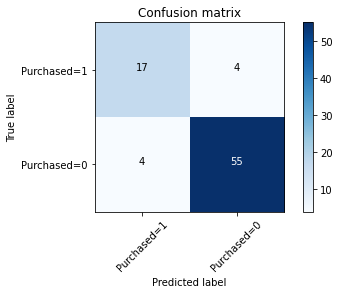

In [119]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Purchased=1','Purchased=0'],normalize= False,  title='Confusion matrix')

In [120]:
print (classification_report(y_test, yhat))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        59
           1       0.81      0.81      0.81        21

    accuracy                           0.90        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.90      0.90      0.90        80



In [121]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.35494412803735875